In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os.path
import operator
from datetime import datetime
%matplotlib notebook

In [2]:
pollution = pd.read_csv(os.path.join('data', 'pollution_data.csv'))

In [3]:
proper_dates = pd.to_datetime(pollution.when.values)
index = pd.MultiIndex.from_tuples(list(zip(proper_dates.year, proper_dates.month, proper_dates.day)),
                                 names=['Year', 'Month','Day'])

<IPython.core.display.Javascript object>


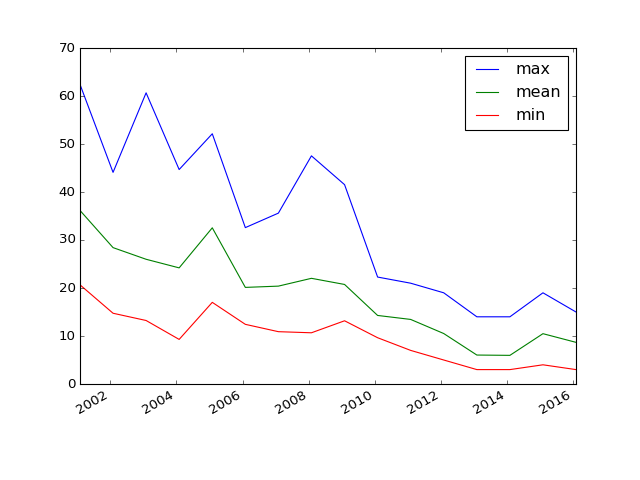

In [4]:
quantitative = pd.DataFrame(
    {'station': pollution.station.values,
     'magnitude': pollution.magnitude.values,
     'measurement': pollution.measurement.values},
    index=index
)


filtered = quantitative[(quantitative.station == 'Cuatro Caminos') & (quantitative.magnitude == 'SO2')]
years = []
mean = []
maximum = []
minimum = []
for year in set(filtered.index.get_level_values('Year')):
    mean.append(filtered.loc[year, 1].measurement.mean())
    maximum.append(filtered.loc[year, 1].measurement.max())
    minimum.append(filtered.loc[year, 1].measurement.min())
    years.append(datetime(year, 1, 31))
    
pd.DataFrame({'mean': mean,
              'max': maximum,
              'min': minimum}, index=years).plot()